## Task 3 --  EDA Analysis

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset

In [8]:
df = pd.read_csv("Loan_Data Update.csv")
df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
1,Male,Yes,0,Graduate,No,8001,0,30.0,360.0,1,Semiurban,N
2,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
3,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
4,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
636,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
637,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
638,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 640 non-null    object 
 1   Marital Status                         640 non-null    object 
 2   Family members                         640 non-null    int64  
 3   Status of education                    640 non-null    object 
 4   Self_Employed                          640 non-null    object 
 5   Income of applicant                    640 non-null    int64  
 6   Income of coapplicant                  640 non-null    int64  
 7   LoanAmount applied for (in thoudands)  640 non-null    float64
 8   Loan_Amount_Duration                   640 non-null    float64
 9   Credit_History                         640 non-null    int64  
 10  Property_Area                          640 non-null    object 
 11  Loan_S

In [10]:
df.describe()


,Family members,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.678125,3790.887500,1356.851562,121.256250,342.800000,0.839063
std,0.971981,1636.653733,1429.951891,39.904267,64.533845,0.367761
min,0.000000,1000.000000,0.000000,30.000000,84.000000,0.000000
25%,0.000000,2651.250000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3500.000000,1200.000000,120.000000,360.000000,1.000000
75%,1.000000,4669.500000,2303.250000,145.000000,360.000000,1.000000
max,3.000000,9103.000000,5810.000000,238.000000,480.000000,1.000000


#### Checking Outliers in Dataset


Checking outliers in below columns :-

`Income of applicant`
`Income of coapplicant`
`LoanAmount applied for (in thoudands)`
`Loan_Amount_Duration`
`Credit_History`

In [11]:
# Finding ouliers in income of applicants column

Q1,Q3 = np.percentile(df['Income of applicant'], [25,75])

Q1 , Q3

(2651.25, 4669.5)

In [12]:
IQR = Q3-Q1
IQR

2018.25

In [13]:
UX = Q3+1.5*IQR
LX = Q1-1.5*IQR

UX , LX

(7696.875, -376.125)

In [14]:
df = df.loc[(df['Income of applicant']>LX) & (df['Income of applicant']<UX)]
df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
2,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
3,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
4,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
5,Male,Yes,0,Graduate,No,5118,0,30.0,360.0,1,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
636,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
637,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
638,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


##### Ouliers Present in `Income of applicant`

In [15]:
# checking Outliers in `Income of coapplicant`

Q1, Q3 = np.percentile(df['Income of coapplicant'],[25,75])

Q1,Q3

(0.0, 2307.0)

In [16]:
IQR = Q3-Q1
IQR

2307.0

In [17]:
UX = Q3+1.5*IQR
LX = Q1-1.5*IQR

UX, LX

(5767.5, -3460.5)

In [18]:
df = df.loc[(df['Income of coapplicant']>LX) & (df['Income of coapplicant']<UX)]

df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
2,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
3,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
4,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
5,Male,Yes,0,Graduate,No,5118,0,30.0,360.0,1,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
636,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
637,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
638,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


##### Outliers present in `Income of coapplicant`

In [19]:
# Checking Outliers in `LoanAmount applied for (in thoudands)`

Q1, Q3 = np.percentile(df['LoanAmount applied for (in thoudands)'],[25,75])

Q1,Q3

(100.0, 145.0)

In [20]:
IQR = Q3-Q1
IQR

45.0

In [21]:
UX = Q3+1.5*IQR
LX = Q1-1.5*IQR

UX,LX

(212.5, 32.5)

In [22]:
df = df.loc[(df['LoanAmount applied for (in thoudands)']>LX) & (df['LoanAmount applied for (in thoudands)']<UX)]

df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
2,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
3,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
4,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
6,Male,Yes,0,Graduate,No,3344,1917,120.0,360.0,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
636,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
637,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
638,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


##### Outlier present in `LoanAmount applied for (in thoudands)`

In [23]:
# Checking Ouliers in Loan_Amount_Duration cloumn

Q1,Q3 = np.percentile(df['Loan_Amount_Duration'],[25,75])

Q1,Q3

(360.0, 360.0)

##### No Outliers in `Loan_Amount_Duration`

In [24]:
# Final dataframe is df

df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
2,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
3,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
4,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
6,Male,Yes,0,Graduate,No,3344,1917,120.0,360.0,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
636,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
637,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
638,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


In [26]:
df.to_csv("FinalData.csv")

#### Visualization

#### Plot1 - `Gender Vs Loan_Status`

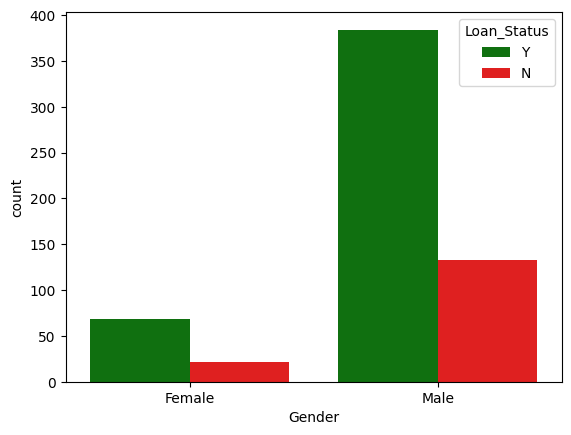

In [ ]:
sns.countplot(x= 'Gender', data = df , hue = 'Loan_Status', palette=("Green" , "Red"))
plt.show()

#### Plot-2 `Property_Area vs Loan_Status`

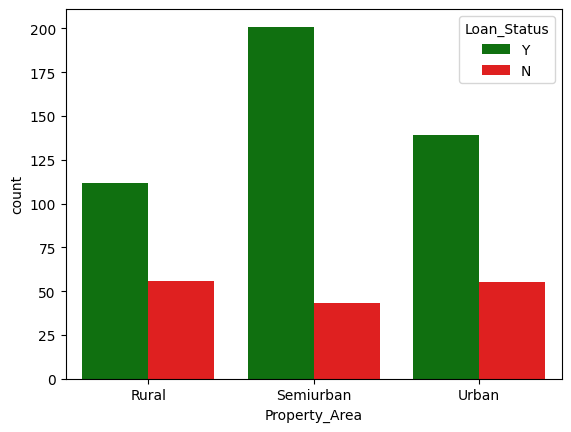

In [ ]:
sns.countplot(x='Property_Area', data=df, hue='Loan_Status', palette=['Green','red'] )
plt.show()


#### Plot-3 `Income of applicant & LoanAmount Applied  Vs Loan_status`

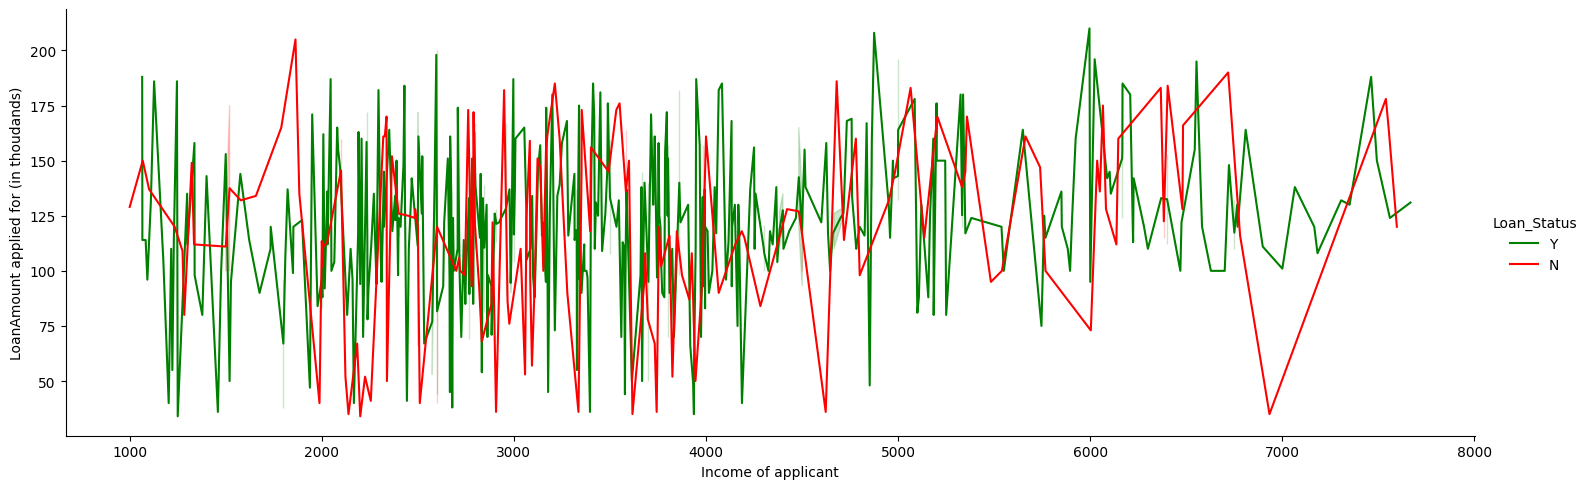

In [ ]:
sns.relplot(x='Income of applicant', y = 'LoanAmount applied for (in thoudands)', hue ='Loan_Status', data=df, kind= 'line' , aspect=3, palette=['Green','Red'])
plt.show()

#### Plot `Family Members Vs Loan_status`

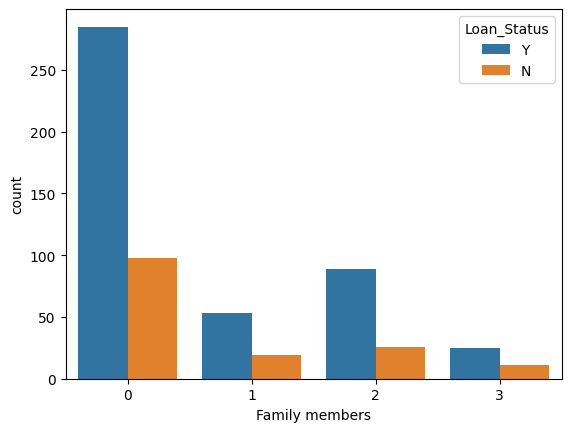

In [ ]:
sns.countplot(x='Family members' ,data= df,  hue='Loan_Status')
plt.show()